# seaborn: statistical data visualization

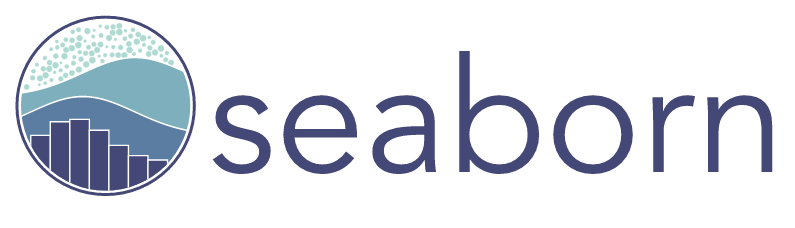

- Seaborn é um biblioteca Python para visualização de dados, baseada no matplotlib. 
- Ela provê uma interface de alto nível para desenhar informações estatístcas de forma atrativa.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importando o seaborn
import seaborn as sns

## Palmer Penguins

Esse dataset contém 344 pinguins, de 3 espécies diferentes, observados em três ilhas do arquipélago Palmer, na Antar*a.

Informações:
- species: Espécie.
- island: Ilha que foi observado.
- bill_length_mm: Comprimento do bico, em mm.
- bill_depth_mm: Profundidade do bico, em mm.
- flipper_length_mm:  Comprimento da nadadeira, em mm.
- body_mass_g: Massa corporal, em gramas.
- sex: Sexo



In [2]:
pinguins = pd.read_csv('https://raw.githubusercontent.com/ftorresd/OCEAN-datasets/main/penguins/penguins.csv')

In [3]:
pinguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
pinguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
pinguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Estilo

In [6]:
# REF: https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_style("whitegrid") 

## Count Plot e Bar Plot

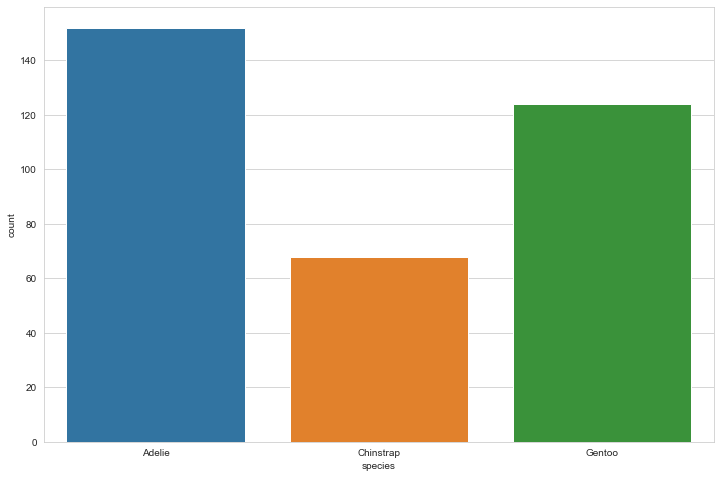

In [7]:
plt.figure(figsize=(12, 8))
sns.countplot(x="species", data=pinguins);


In [8]:
buffer = pinguins.groupby(['island'])['body_mass_g'].sum()
buffer = buffer.reset_index()
buffer

,island,body_mass_g
0,Biscoe,787575.0
1,Dream,460400.0
2,Torgersen,189025.0


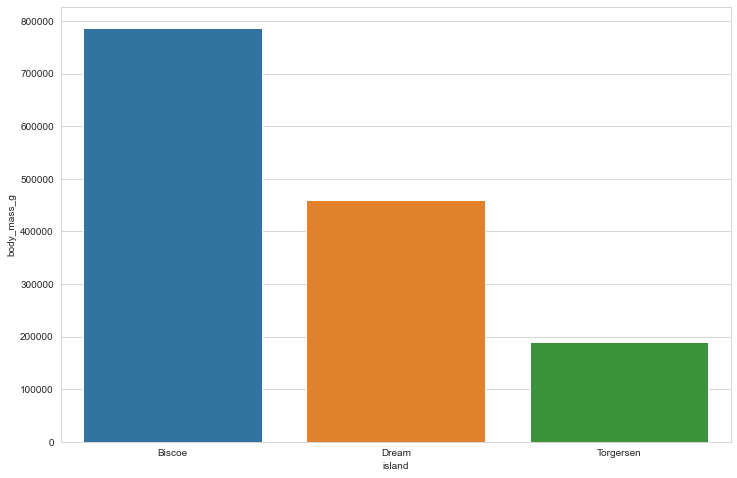

In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(x="island", y="body_mass_g", data=buffer)
#plt.xticks(rotation=90);

## Paleta de Cores

Documentação: http://seaborn.pydata.org/tutorial/color_palettes.html

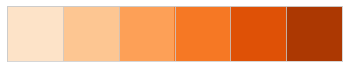

In [10]:
sns.palplot(sns.mpl_palette("Oranges"))

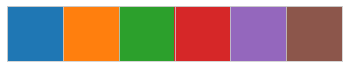

In [11]:
sns.palplot(sns.mpl_palette("tab10"))

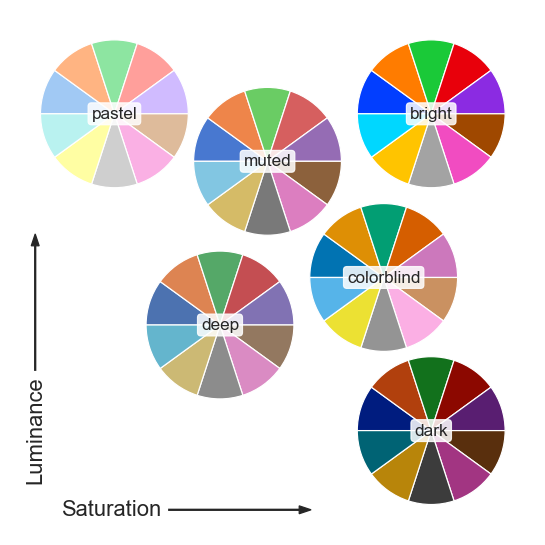

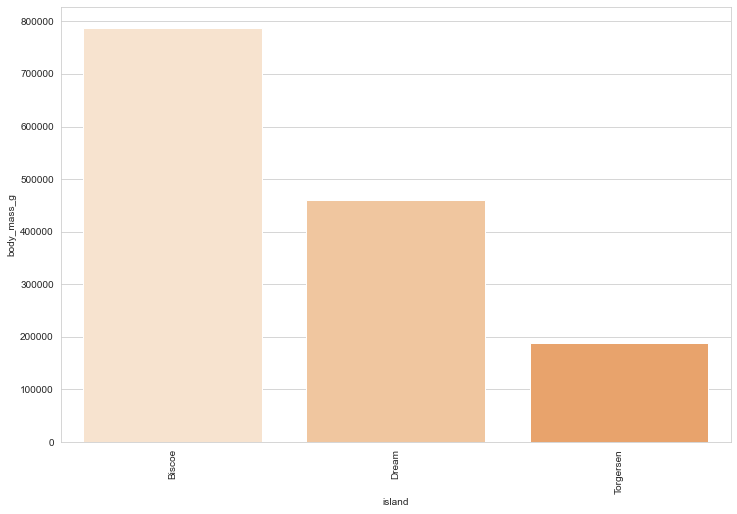

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x="island", y="body_mass_g", data=buffer, palette=sns.color_palette("Oranges"))
plt.xticks(rotation=90);

## Relacionamento

<Figure size 864x576 with 0 Axes>

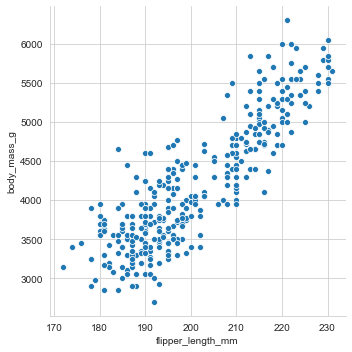

In [13]:
plt.figure(figsize=(12, 8))
sns.relplot(x="flipper_length_mm", y="body_mass_g", data=pinguins);

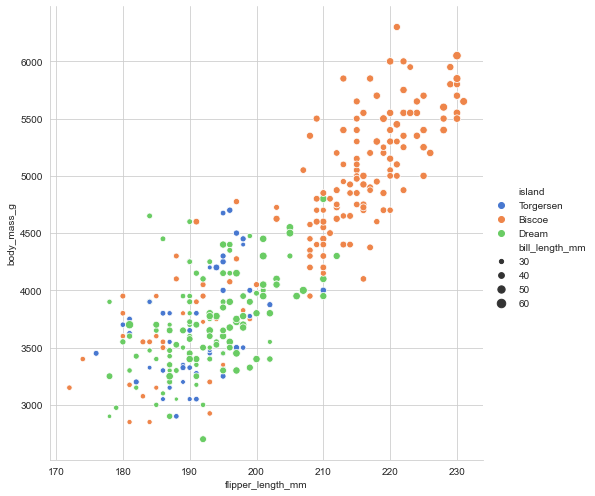

In [14]:
sns.relplot(x="flipper_length_mm", y="body_mass_g", data=pinguins, hue="island", size="bill_length_mm", palette='muted', height=7);

##  Joint Plot

C:\kaiomenezes\anaconda3agosto\lib\site-packages\seaborn\distributions.py:434: UserWarning: The following kwargs were not used by contour: 'hue'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


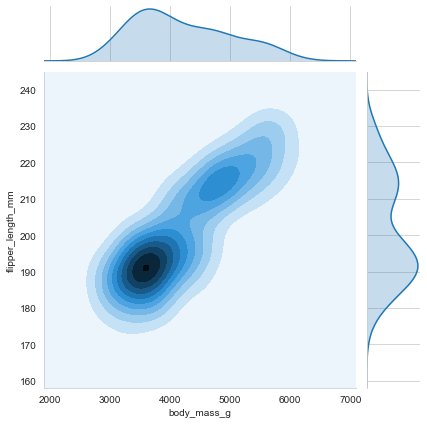

In [15]:
# kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }
g = sns.jointplot(data=pinguins, x="body_mass_g", y="flipper_length_mm", hue="species", kind='kde');
g.savefig('teste.png', dpi=300)

## Desafio

### Qual é o plot de relacionamento, ou joint plot, que mais diferencia as três espécies?

sns.jointplot(data=pinguins, x="bill_length_mm", y="flipper_length_mm", hue="species", kind='scatter');

## Pair Plot

<Figure size 864x576 with 0 Axes>

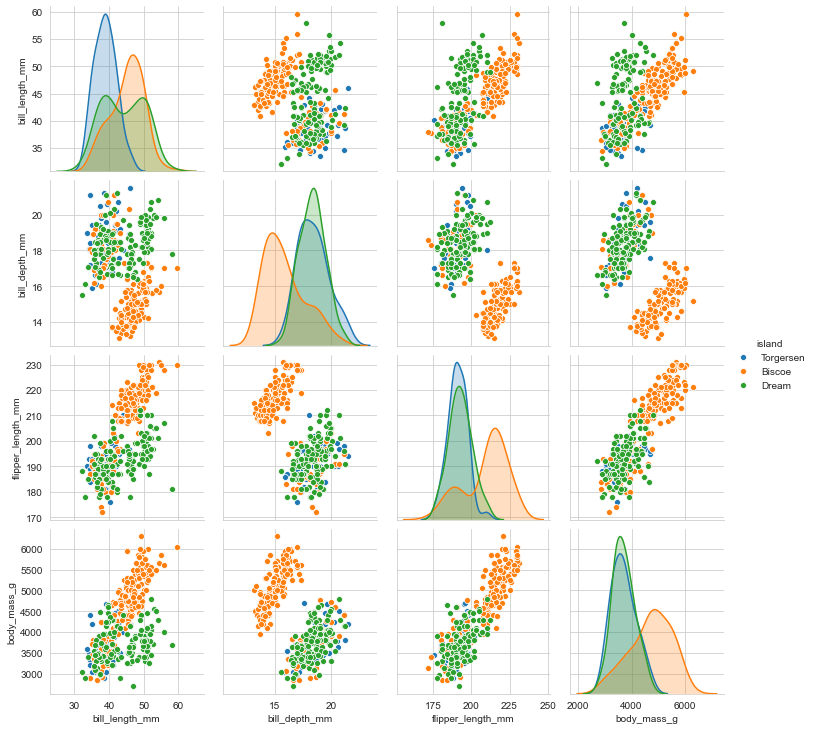

In [16]:
plt.figure(figsize=(12, 8))
sns.pairplot(pinguins, hue="island");

## Heatmap

### Preparando os dados

In [17]:
buffer = pinguins.pivot_table(index='species', columns='island', values='flipper_length_mm', aggfunc='mean')
buffer

island,Biscoe,Dream,Torgersen
species,,,
Adelie,188.795455,189.732143,191.196078
Chinstrap,NaN,195.823529,NaN
Gentoo,217.186992,NaN,NaN


### Em um heatmap, a mesma variável é avaliada para diferentes combinações de categorias.

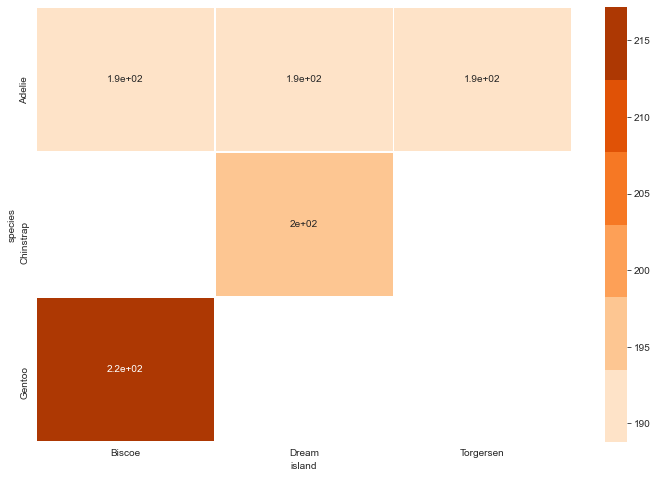

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=buffer, annot=True, linewidths=.5, cmap=sns.color_palette('Oranges'));

## Box Plot

Em estatística descritiva, diagrama de caixa, diagrama de extremos e quartis, boxplot ou box plot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis. 

O box plot tem uma reta (whisker ou fio de bigode) que estende–se verticalmente ou horizontalmente a partir da caixa, indicando a variabilidade fora do quartil superior e do quartil inferior.

Os valores atípicos ou outliers (valores discrepantes) podem ser plotados como pontos individuais.


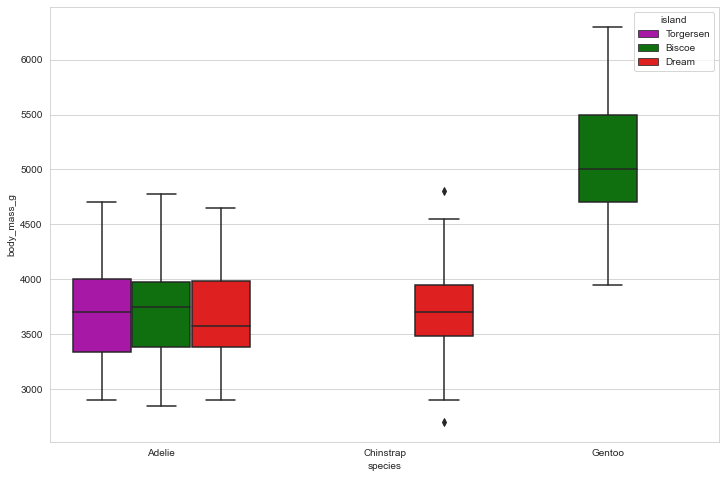

In [19]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

# sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="species", y="body_mass_g",
            hue="island", palette=["m", "g", "r"],
            data=pinguins);

# sns.despine(offset=10, trim=True);

# import matplotlib.ticker as plticker
# ax.yaxis.set_major_locator(plticker.MultipleLocator(base=100))

In [20]:
(pinguins[pinguins['species'] == 'Gentoo']).describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


## Regressão (Linear)

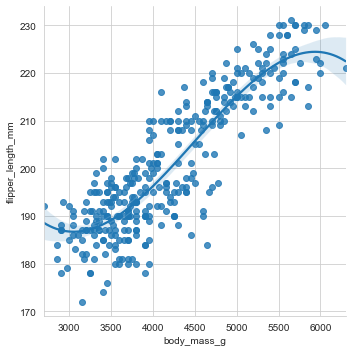

In [21]:
# order (int): If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.lmplot(x="body_mass_g", y="flipper_length_mm", data=pinguins, order=3);